In [1]:
import sys
import platform
print(platform.python_version())
print(sys.path)

3.8.13
['d:\\Projects\\DrugLabelExtraction', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\python38.zip', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\DLLs', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\lib', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env', '', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\lib\\site-packages', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\lib\\site-packages\\win32', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\lib\\site-packages\\win32\\lib', 'c:\\Users\\tonmo\\.conda\\envs\\paddle_env\\lib\\site-packages\\Pythonwin']


In [2]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!conda list

# packages in environment at C:\Users\tonmo\.conda\envs\paddle_env:
#
# Name                    Version                   Build  Channel
astor                     0.8.1                    pypi_0    pypi
asttokens                 2.0.5              pyhd3eb1b0_0  
attrdict                  2.0.1                    pypi_0    pypi
babel                     2.10.3                   pypi_0    pypi
backcall                  0.2.0              pyhd3eb1b0_0  
bce-python-sdk            0.8.73                   pypi_0    pypi
ca-certificates           2022.4.26            haa95532_0  
cachetools                5.2.0                    pypi_0    pypi
certifi                   2022.5.18.1      py38haa95532_0  
cfgv                      3.3.1                    pypi_0    pypi
charset-normalizer        2.0.12                   pypi_0    pypi
click                     8.1.3                    pypi_0    pypi
colorama                  0.4.5                    pypi_0    pypi
cssselect                 1.1

# 1. Install and Import Dependencies

In [4]:
# GitHub repo installation of paddle
# !python -m pip install paddlepaddle-gpu==2.3.0.post112 -f https://www.paddlepaddle.org.cn/whl/windows/mkl/avx/stable.html
# !python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple
# !python -m pip install --no-cache-dir paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple
# !python -m pip install paddlepaddle-gpu==2.3.0 -i https://mirror.baidu.com/pypi/simple
# !python -m pip install --no-cache-dir paddlepaddle-gpu==2.3.0 -i https://mirror.baidu.com/pypi/simple
# !pip install --no-cache-dir paddlepaddle-gpu
# !conda install -c paddle paddlepaddle-gpu=2.0.0

In [5]:
# Install paddle OCR
# !pip install paddleocr
# !conda install -c esri paddleocr -y
# !pip install --no-cache-dir paddleocr

In [6]:
# Clone paddle OCR repo - get FONTS for visualization
# !git clone https://github.com/PaddlePaddle/PaddleOCR

In [7]:
# !pip show paddleocr

In [8]:
# import paddleocr

In [9]:
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import cv2 #opencv
import os # folder directory navigation

# 2. Instantiate Model and Detect

In [10]:
# Setup model
ocr_model = PaddleOCR(lang='en')

[2022/06/23 00:48:18] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\tonmo/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\tonmo/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_

In [11]:
img_path = os.path.join('.', 'drug1.jpg')

In [12]:
# Run the ocr method on the ocr model
result = ocr_model.ocr(img_path)

[2022/06/23 00:48:20] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/06/23 00:48:22] ppocr DEBUG: dt_boxes num : 6, elapse : 2.1594202518463135
[2022/06/23 00:48:22] ppocr DEBUG: rec_res num  : 6, elapse : 0.018000125885009766


In [13]:
result

[[[[218.0, 181.0], [228.0, 177.0], [232.0, 186.0], [222.0, 190.0]],
  ('Rx', 0.5575389862060547)],
 [[[219.0, 199.0], [288.0, 202.0], [288.0, 216.0], [218.0, 214.0]],
  ('S0 MCG TABLETS', 0.8884144425392151)],
 [[[217.0, 218.0], [337.0, 215.0], [338.0, 232.0], [218.0, 235.0]],
  ('TAKE ONE TABLET BY', 0.9609225392341614)],
 [[[219.0, 232.0], [285.0, 234.0], [285.0, 249.0], [218.0, 246.0]],
  ('EVERY DAY', 0.9429663419723511)],
 [[[219.0, 257.0], [254.0, 260.0], [253.0, 274.0], [218.0, 272.0]],
  ('QTY:90', 0.947418212890625)],
 [[[218.0, 289.0], [293.0, 293.0], [292.0, 306.0], [217.0, 303.0]],
  ('OF:12-012019', 0.8216037154197693)]]

In [14]:
for res in result:
    print(res[1][0]) 

Rx
S0 MCG TABLETS
TAKE ONE TABLET BY
EVERY DAY
QTY:90
OF:12-012019


# 3. Visualise Results

In [15]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [16]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [17]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

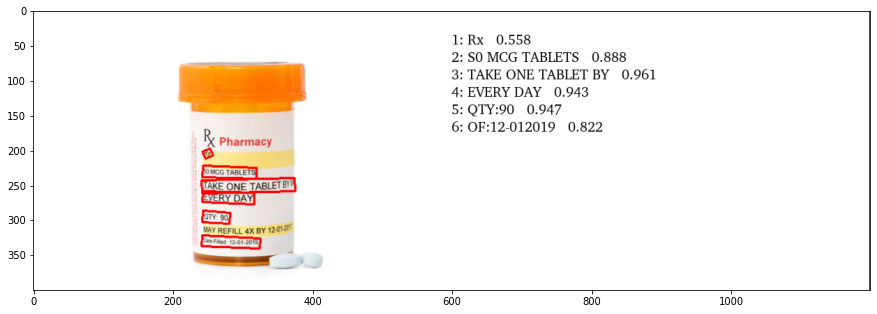

In [18]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

In [19]:
img.shape

(360, 540, 3)